Final Project : Credit Card Fraud Detection  
Source : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?fbclid=IwAR0cE44LnzPeueP1CDPSbOJvwizZIStTZTRFqBo12RAQ0Tdj3FXs0S1v3BA
 
 Name: Nishant Shrestha and Tung Tran  
 Class: CSCI 349 SP 2023  
 Instructor: Dr. Brian King  
 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
df_fraud = pd.read_csv('../data/creditcard.csv')
df_fraud.info()
%config Completer.use_jedi = False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.  
'Amount' is the transaction Amount.  
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.  


In [5]:
df_fraud['Time'] = df_fraud.Time.astype(int)
df_fraud['Time'] = pd.to_numeric(arg =df_fraud['Time'], downcast = 'integer' )
df_fraud['Amount'] = pd.to_numeric(arg = df_fraud['Amount'],downcast = 'float')
df_fraud.Class = pd.Categorical(df_fraud.Class)
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Time    284807 non-null  int32   
 1   V1      284807 non-null  float64 
 2   V2      284807 non-null  float64 
 3   V3      284807 non-null  float64 
 4   V4      284807 non-null  float64 
 5   V5      284807 non-null  float64 
 6   V6      284807 non-null  float64 
 7   V7      284807 non-null  float64 
 8   V8      284807 non-null  float64 
 9   V9      284807 non-null  float64 
 10  V10     284807 non-null  float64 
 11  V11     284807 non-null  float64 
 12  V12     284807 non-null  float64 
 13  V13     284807 non-null  float64 
 14  V14     284807 non-null  float64 
 15  V15     284807 non-null  float64 
 16  V16     284807 non-null  float64 
 17  V17     284807 non-null  float64 
 18  V18     284807 non-null  float64 
 19  V19     284807 non-null  float64 
 20  V20     284807 non-null  f

In [6]:
df_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [7]:
df_fraud.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

We can clearly see that the dataset is highly unbalanced with only 492 fraud activity. As a result, any simple performance metric, such as the accuracy of a model, won't be a good indicator of how our model will perform. Moving on, we will keep this in mind.

Good visualizations

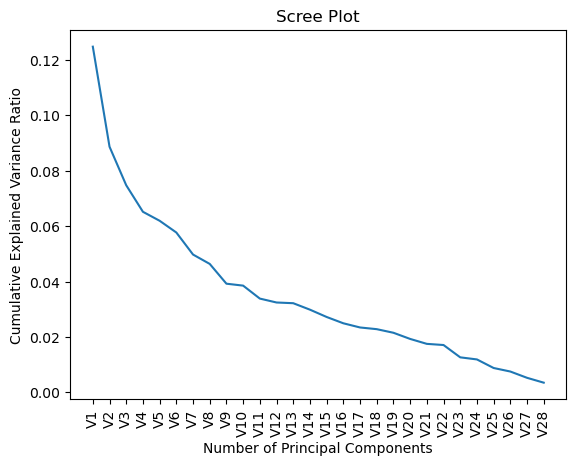

In [8]:

# generating a scree plot for the PCA transformed columns

variance = np.var(df_fraud.iloc[:,1:29], axis=0)
explained_variance_ratio = variance / np.sum(variance)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(explained_variance_ratio)
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.xticks(rotation=90)
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [9]:
num_pca_to_use = 10
X_pca = df_fraud.iloc[:,1:num_pca_to_use+1]
X_amount = df_fraud.iloc[:, -2]
X_time = df_fraud.iloc[:, 0]

X = np.concatenate([X_pca, 
                    X_amount.to_numpy().reshape(-1,1)], axis=1)
y = df_fraud.iloc[:, -1]
X.shape, y.shape

((284807, 11), (284807,))

####
### ***We choose F2 score as the objective for the following reason***:

The task is to find fraud transaction so we need to prioritize positive class. So the F-measures scoring family (which are harmonic means of precision and recall) is chosen to optimize both precision and recall.  
Furthermore, False Negatives (FNs), or transactions deemed to be not fraud turn out to be fraud, would cause total loss of money for a customer. So we think FNs are more costly than false positives.   
**Thus we chose F2 score as the objective we're optimizing for.**  

To demonstrate the effect of F2 score in this case, we compare it to F1 score, which is used when false predictions are equally costly:  
$$ F1 = 2 \frac{\text{(precision)}\text{(recall)}}{\text{(precision)} + \text{(recall)}}  = 2 \frac{1}{\frac{1}{\text{(recall)}} + \frac{1}{\text{(precision)}}}$$  
so (precision) and (recall) contribute equally to $F1$ score, however,      
$$ F2 = 5 \frac{\text{(precision)}\text{(recall)}}{4\text{(precision)} + \text{(recall)}} = 5 \frac{1}{\frac{4}{\text{(recall)}} + \frac{1}{\text{(precision)}}}$$ 
where recall has higher impact on the overall $F2$ score, so FNs weigh more.

### Naive algorithms

Simple algorithms as low-bar baseline

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, precision_recall_curve, fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


def auc_pr(clf, X_test, y_test):
    p, r, _ = precision_recall_curve(y_test, clf.predict(X_test))
    return auc(r, p)

def f2_score(clf, X_test, y_test):
    return fbeta_score(y_test, clf.predict(X_test), average='binary', beta=2)

### Linear Algorithms

Simple and fast, great baselines

#### Logistic Regression

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
RANDOM_STATE = 42

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [12]:
# TODO: Scale data
# https://scikit-learn.org/stable/modules/preprocessing.html

param_grid = { 'class_weight' : [None, 'balanced'],
               'C' : [0.1, 0.5, 1.0, 5.0, 10.0],
               'penalty' : ['l2']
             }

grid = GridSearchCV(LogisticRegression(random_state=RANDOM_STATE), param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True, n_jobs = 8)
grid_result = grid.fit(X_scaled,y)

print(f'best f2_score: {grid_result.best_score_}')
print('best parameters :', grid_result.best_params_)
#0.5748207614968848

best f2_score: 0.5748207614968848
best parameters : {'C': 0.5, 'class_weight': None, 'penalty': 'l2'}


#### Naive Bayes

In [13]:
param_grid = { 'var_smoothing' : [1e-9, 1e-8, 1e-7],
             }

grid = GridSearchCV(GaussianNB(), param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True, n_jobs = 8)
grid_result = grid.fit(X,y)

print(f'best f2_score: {grid_result.best_score_}')
print('best parameters :', grid_result.best_params_)

best f2_score: 0.2044222543860957
best parameters : {'var_smoothing': 1e-07}


### Non-linear Algorithms

from sklearn.tree import DecisionTreeClassifier

param_grid = { 'criterion' : ['gini', 'entropy', 'log_loss'],
               'max_depth' : [3,5,7,9,11],
               'splitter': ["best", "random"],
               'min_samples_split' : [2,4,6,8,10]
             }

grid = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True, n_jobs = 8)
grid_result = grid.fit(X_scaled,y)

print(f'best f2_score: {grid_result.best_score_}')
print('best parameters :', grid_result.best_params_)

### K-Nearest Neighbor

In [14]:
param_grid = { 'n_neighbors' : [3,5,7,9,12],
               'weights': ['uniform', 'distance']
             }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True, n_jobs = 8)
grid_result = grid.fit(X_scaled,y)

print(f'best f2_score: {grid_result.best_score_}')
print('best parameters :', grid_result.best_params_)

best f2_score: 0.7730654942919806
best parameters : {'n_neighbors': 3, 'weights': 'distance'}


#### C-Support Vector Classification

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

param_grid = { 'C' : [0.1, 0.5, 1, 5],
              "loss": ['hinge', 'squared_hinge'],
              "max_iter": [10000]
             }

svc = LinearSVC(random_state=RANDOM_STATE)
grid = GridSearchCV(svc, param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True, n_jobs = 8)
grid_result = grid.fit(X_scaled,y)

print(f'best f2_score: {grid_result.best_score_}')
print('best parameters :', grid_result.best_params_)

param_grid = { 'C' : [0.1, 0.5, 1, 5],
               'kernel': ['linear'] # Linear kernel for better scalability
             }

svc = SVC(gamma='auto', random_state=RANDOM_STATE)
grid = GridSearchCV(svc, param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True, n_jobs = 8)
grid_result = grid.fit(X_scaled,y)

print(f'best f2_score: {grid_result.best_score_}')
print('best parameters :', grid_result.best_params_)

### Bagging
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html


Boosting
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
from sklearn.ensemble import BaggingClassifier

param_grid = {'n_estimators': [10]}

best_params = {'C': 0.5, 'class_weight': None, 'penalty': 'l2'}
clf = BaggingClassifier(estimator=LogisticRegression(**best_params), random_state=42)
grid = GridSearchCV(clf, param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True)
grid_result = grid.fit(X_scaled,y)

print(f'best f2_score: {grid_result.best_score_}')
print('best parameters :', grid_result.best_params_)

best f2_score: 0.5784202180154926
best parameters : {'n_estimators': 10}


param_grid = {'n_estimators': [10]}

best_params = {'C': 1, 'kernel': 'linear'}
svc = SVC(gamma='auto', random_state=RANDOM_STATE, **best_params)
clf = BaggingClassifier(estimator=svc, random_state=42)
grid = GridSearchCV(clf, param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True)
grid_result = grid.fit(X_scaled,y)

print(f'best f2_score: {grid_result.best_score_}')
print('best parameters :', grid_result.best_params_)

**Remark**: No clear improvement

### Data Sampling

- Try the above, then head to:  
https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets  
https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer  
Compare results, reduce performance gaps with their techniques.  


In [16]:
from imblearn.combine import SMOTEENN

sme = SMOTEENN(random_state=RANDOM_STATE)
X_res, y_res = sme.fit_resample(X_scaled, y)
X_res.shape, y_res.shape

((567733, 11), (567733,))

In [17]:
param_grid = { 'class_weight' : [None],
               'C' : [0.5],
               'penalty' : ['l2']
             }

grid = GridSearchCV(LogisticRegression(random_state=RANDOM_STATE), param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True, n_jobs = 8)
grid_result_logistic = grid.fit(X_res,y_res)

print(f'best f2_score: {grid_result_logistic.best_score_}')
print('best parameters :', grid_result_logistic.best_params_)
# 0.912997078971884

best f2_score: 0.912997078971884
best parameters : {'C': 0.5, 'class_weight': None, 'penalty': 'l2'}


In [18]:
from sklearn.naive_bayes import GaussianNB

param_grid = { 'var_smoothing' : [1e-7],
             }

grid = GridSearchCV(GaussianNB(), param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True, n_jobs = 8)
grid_result_bayes = grid.fit(X_res,y_res)

print(f'best f2_score: {grid_result_bayes.best_score_}')
print('best parameters :', grid_result_bayes.best_params_)

best f2_score: 0.776929103923513
best parameters : {'var_smoothing': 1e-07}


In [19]:
param_grid = { 'n_neighbors' : [3],
               'weights': ['distance']
             }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit=True, n_jobs = 8)
grid_result_kneighbors = grid.fit(X_res,y_res)

print(f'best f2_score: {grid_result_kneighbors.best_score_}')
print('best parameters :', grid_result_kneighbors.best_params_)

best f2_score: 0.9999212209001609
best parameters : {'n_neighbors': 3, 'weights': 'distance'}


param_grid = { 'C' : [1],
               'kernel': ['linear']
             }

svc = SVC(gamma='auto', random_state=RANDOM_STATE)
grid = GridSearchCV(svc, param_grid, 
                    return_train_score=True, cv=skf, scoring=f2_score, refit ='f1_macro')
grid_result = grid.fit(X_res,y_res)

print(f'best f2_score: {grid_result.best_score_}')
print('best parameters :', grid_result.best_params_)

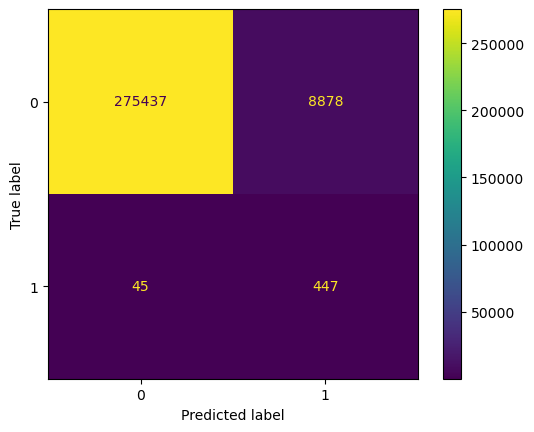

In [24]:
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    accuracy_score
)
ConfusionMatrixDisplay.from_predictions(y, grid_result_logistic.best_estimator_.predict(X_scaled))
plt.show()

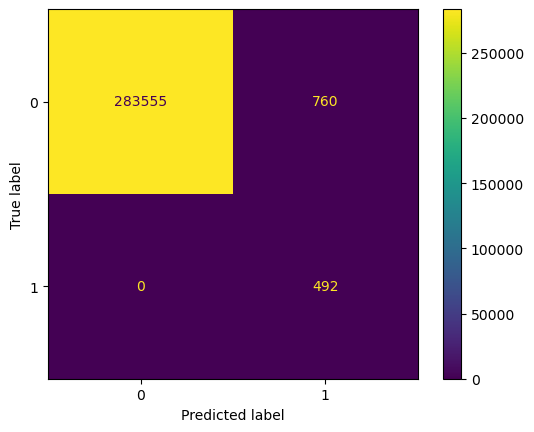

In [25]:
ConfusionMatrixDisplay.from_predictions(y, grid_result_kneighbors.best_estimator_.predict(X_scaled))
plt.show()

References:  
https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/